<a href="https://colab.research.google.com/github/v4vishalchauhan/cool_nlp/blob/master/Mahabharat_w2v.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from zipfile import ZipFile
import codecs
import glob
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
z=ZipFile('mahatxt.zip','r')
z.extractall()

In [34]:
import io
data_path = 'mb.txt'
with open(data_path, 'r') as f:
    lines = f.read().split('\n')

print(lines[:10])   

['Adi Parva', ' ', 'Chapter One', 'Maharaja Shantanu Marries the Celestial Ganga', ' ', 'According to the historical records of this earth, there once lived a King named Maharaja Shantanu, the son of Pratipa, who took his birth in the solar dynasty and was considered naradeva, the manifest representative of the Supreme Lord on earth. His fame and rule extended to all parts of the world. The qualities of self-control, liberality, forgiveness, intelligence, modesty, patience and power always resided this exalted emperor. His neck was marked with three lines like a conchshell, and his shoulders were broad. In prowess He resembled a maddened elephant. Above all these qualities, he was a devoted servant of Lord Vishnu, and therefore he was given the title, "King of kings".', 'Once when Maharaja Shantanu, that bull among men, was wandering in the forest, he came upon a place frequented by the Siddhas and Charanas (a class of heavenly demigods). There he saw an angelic woman who appeared like

In [40]:
corpus=''
for i in lines:
    corpus+=i
print(corpus[:50])    

Adi Parva Chapter OneMaharaja Shantanu Marries the


In [41]:
nltk.download('stopwords')

from nltk import word_tokenize,sent_tokenize
sentences=sent_tokenize(corpus)
print(len(sentences))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
16445


In [0]:
import re
def clean_sent(raw):
    clean=re.sub('[^a-zA-Z]',' ',raw)
    words=clean.split()
    return words


In [43]:
raw_sent=[clean_sent(i) for i in sentences]
from nltk.corpus import stopwords


print(len(raw_sent),raw_sent[:5])

16445 [['Adi', 'Parva', 'Chapter', 'OneMaharaja', 'Shantanu', 'Marries', 'the', 'Celestial', 'Ganga', 'According', 'to', 'the', 'historical', 'records', 'of', 'this', 'earth', 'there', 'once', 'lived', 'a', 'King', 'named', 'Maharaja', 'Shantanu', 'the', 'son', 'of', 'Pratipa', 'who', 'took', 'his', 'birth', 'in', 'the', 'solar', 'dynasty', 'and', 'was', 'considered', 'naradeva', 'the', 'manifest', 'representative', 'of', 'the', 'Supreme', 'Lord', 'on', 'earth'], ['His', 'fame', 'and', 'rule', 'extended', 'to', 'all', 'parts', 'of', 'the', 'world'], ['The', 'qualities', 'of', 'self', 'control', 'liberality', 'forgiveness', 'intelligence', 'modesty', 'patience', 'and', 'power', 'always', 'resided', 'this', 'exalted', 'emperor'], ['His', 'neck', 'was', 'marked', 'with', 'three', 'lines', 'like', 'a', 'conchshell', 'and', 'his', 'shoulders', 'were', 'broad'], ['In', 'prowess', 'He', 'resembled', 'a', 'maddened', 'elephant']]


In [76]:
sent=[]
stop=list(stopwords.words('english'))
print(stop)
for i in raw_sent:
    for j in i:
        if j.lower() in stop:
            i.remove(j)
    sent.append(i)
raw_count=0
sent_count=0
for i in raw_sent:
    for j in i:
        raw_count+=1
for i in sent:
    for j in i:
        if j =='the' or j=='The':
            sent_count+=1        
print(raw_sent[:5])
print()
print(sent[:5])
print(raw_count,sent_count)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [77]:
print(sent[:5])


[['Adi', 'Parva', 'Chapter', 'OneMaharaja', 'Shantanu', 'Marries', 'Celestial', 'Ganga', 'According', 'historical', 'records', 'earth', 'lived', 'King', 'named', 'Maharaja', 'Shantanu', 'son', 'Pratipa', 'took', 'birth', 'solar', 'dynasty', 'considered', 'naradeva', 'manifest', 'representative', 'Supreme', 'Lord', 'earth'], ['fame', 'rule', 'extended', 'parts', 'world'], ['qualities', 'self', 'control', 'liberality', 'forgiveness', 'intelligence', 'modesty', 'patience', 'power', 'always', 'resided', 'exalted', 'emperor'], ['neck', 'marked', 'three', 'lines', 'like', 'conchshell', 'shoulders', 'broad'], ['prowess', 'resembled', 'maddened', 'elephant']]


In [0]:
# !pip install --upgrade gensim
import gensim.models.word2vec as w2v
model=w2v.Word2Vec(sg=0,
    seed=0,
    workers=8,
    size=300,
    min_count=1,
    window=3
    )

In [100]:

model.build_vocab(sent)
token_count=len(model.wv.vocab)
print(token_count)
model.train(sent, total_words=token_count, epochs=1)

11236


(141727, 150152)

In [101]:
from sklearn.manifold import TSNE
import pandas as pd
tsne = TSNE(n_components=2, random_state=0)
all_word_vectors_matrix = model.wv.syn0
all_word_vectors_matrix_2d = tsne.fit_transform(all_word_vectors_matrix)
points = pd.DataFrame(
    [
        (word, coords[0], coords[1])
        for word, coords in [
            (word, all_word_vectors_matrix_2d[model.wv.vocab[word].index])
            for word in model.wv.vocab
        ]
    ],
    columns=["word", "x", "y"]
)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  after removing the cwd from sys.path.


In [102]:
print(points.iloc[:25,:])

           word          x          y
0           Adi -35.428104  27.313160
1         Parva  18.714006 -11.573262
2       Chapter -22.470402 -16.186523
3   OneMaharaja  15.545356 -13.818749
4      Shantanu -14.071780 -33.679047
5       Marries  16.353657  11.330689
6     Celestial -19.401648 -14.080026
7         Ganga   6.853712 -11.712132
8     According -32.811607  12.917528
9    historical  12.009679 -21.151655
10      records   6.929350  27.586905
11        earth -22.649675   3.162000
12        lived  10.950485   1.800010
13         King   1.275353   9.998170
14        named  20.007641  -8.190003
15     Maharaja  19.874556 -41.674706
16          son  -2.964971  19.184568
17      Pratipa   3.971774  17.144817
18         took  31.001894 -29.792330
19        birth  13.610359  -3.694588
20        solar   8.657408  13.276686
21      dynasty   6.123855  -7.492527
22   considered  -5.809718  14.919029
23     naradeva   1.006213 -11.994775
24     manifest  -3.268084   4.005067


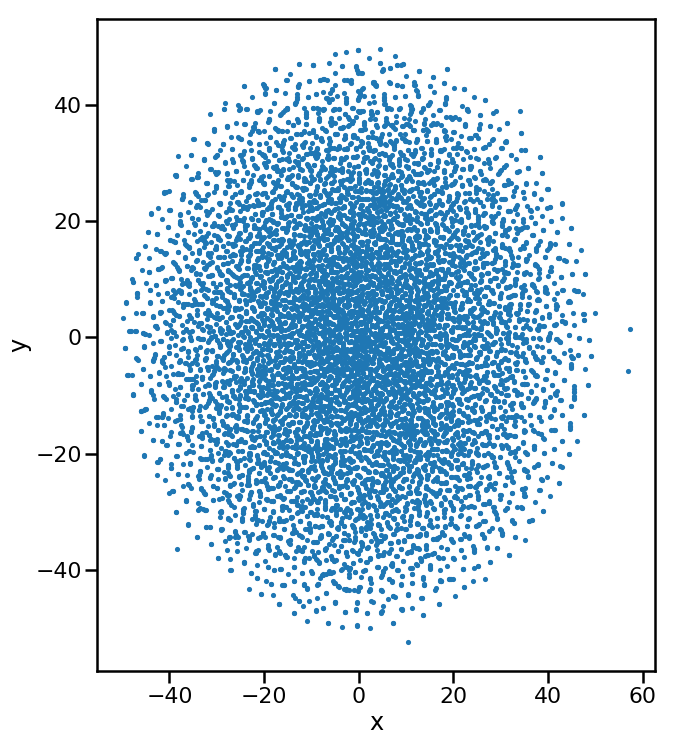

In [103]:
import seaborn as sns
sns.set_context("poster")


points.plot.scatter("x", "y", s=10, figsize=(10, 12))



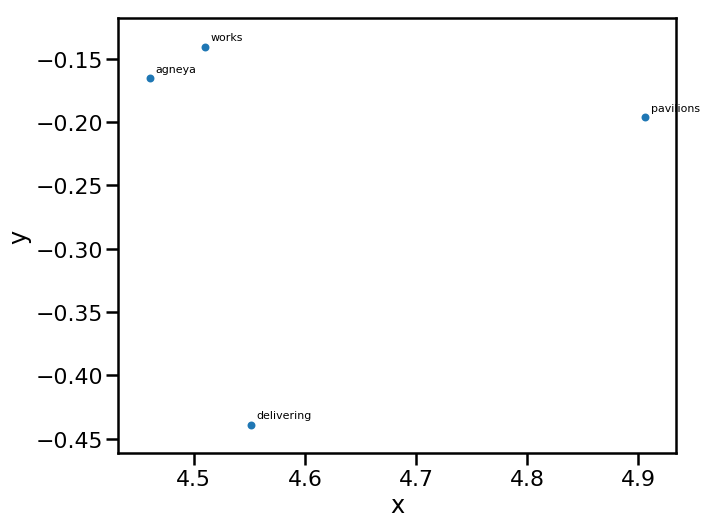

In [104]:


def plot_region(x_bounds, y_bounds):
    slice = points[
        (x_bounds[0] <= points.x) &
        (points.x <= x_bounds[1]) & 
        (y_bounds[0] <= points.y) &
        (points.y <= y_bounds[1])
    ]
    
    ax = slice.plot.scatter('x', 'y', s=35, figsize=(10, 8))
    for i, point in slice.iterrows():
        ax.text(point.x + 0.005, point.y + 0.005, point.word, fontsize=11)



plot_region(x_bounds=(4, 5), y_bounds=(-0.5, -0.1))



In [105]:
model.most_similar('Duryodhana')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('halves', 0.24517673254013062),
 ('humanlike', 0.2317713052034378),
 ('Stopping', 0.20045380294322968),
 ('British', 0.19370147585868835),
 ('stomped', 0.19291749596595764),
 ('arraying', 0.18830087780952454),
 ('prosper', 0.18739071488380432),
 ('preparation', 0.18540193140506744),
 ('shriek', 0.18376678228378296),
 ('defense', 0.18122988939285278)]

In [0]:


def nearest_similarity_cosmul(start1, end1, end2):
    similarities = model.most_similar_cosmul(
        positive=[end2, start1],
        negative=[end1]
    )
    start2 = similarities[0][0]
    print("{start1} is related to {end1}, as {start2} is related to {end2}".format(**locals()))
    return start2



In [93]:
model.wv.save_word2vec_format('model.txt', binary=False)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [107]:
nearest_similarity_cosmul("Arjuna","Kunti", "Duryodhana" )

Arjuna is related to Kunti, as Mother is related to Duryodhana


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `most_similar_cosmul` (Method will be removed in 4.0.0, use self.wv.most_similar_cosmul() instead).
  


'Mother'

In [97]:
model.predict_output_word('Pandavas')

[('sons', 8.9000525e-05),
 ('heart', 8.900033e-05),
 ('Shantanu', 8.9000285e-05),
 ('Kunti', 8.900016e-05),
 ('time', 8.900013e-05),
 ('king', 8.900012e-05),
 ('chariots', 8.900012e-05),
 ('child', 8.900009e-05),
 ('However', 8.900007e-05),
 ('God', 8.900005e-05)]